In [32]:
#importing necessary libraries
import pandas as pd
from pyspark.sql.functions import *
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import descartes

In [33]:
path="s3://finalgeodata/"

In [47]:
#Reading the sample_geo.txt as spark csv file
df=spark.read.option("delimiter", "\t").csv(path+"sample_geo.txt",header=True)
df.show()

+-----------+------------+----------+
|   Latitude|   Longitude|LocationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|         1|
|42.09013298|-87.68915558|         2|
|39.56341754|-75.58753204|         3|
|39.45302347|-87.69374084|         4|
| 38.9537989|-77.01656342|         5|
|39.90031211|-75.74486542|         6|
|36.24009843|-115.1586914|         7|
|26.11330818|-80.09202576|         8|
|34.27036086|-118.3162918|         9|
|38.81664153|-97.62573242|        10|
|33.67614531|-118.1892776|        11|
|28.74612042|-81.44248199|        12|
|38.35152702|-81.69611359|        13|
|39.57271402|-86.35784912|        14|
|30.19543489|-81.45937347|        15|
|40.49826888|-74.16846466|        16|
|34.05601838|-117.9957428|        17|
|38.14426403|-122.5368347|        18|
|38.92940099|-94.39599609|        19|
|39.51639552|-77.81656647|        20|
+-----------+------------+----------+
only showing top 20 rows



In [48]:
#Renaming columns to convenient names
df=df.select("Latitude","Longitude","LocationID").withColumnRenamed("Latitude", "latitude").withColumnRenamed("Longitude", "longitude").withColumnRenamed("LocationID", "locationID")

In [49]:
df.show()

+-----------+------------+----------+
|   latitude|   longitude|locationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|         1|
|42.09013298|-87.68915558|         2|
|39.56341754|-75.58753204|         3|
|39.45302347|-87.69374084|         4|
| 38.9537989|-77.01656342|         5|
|39.90031211|-75.74486542|         6|
|36.24009843|-115.1586914|         7|
|26.11330818|-80.09202576|         8|
|34.27036086|-118.3162918|         9|
|38.81664153|-97.62573242|        10|
|33.67614531|-118.1892776|        11|
|28.74612042|-81.44248199|        12|
|38.35152702|-81.69611359|        13|
|39.57271402|-86.35784912|        14|
|30.19543489|-81.45937347|        15|
|40.49826888|-74.16846466|        16|
|34.05601838|-117.9957428|        17|
|38.14426403|-122.5368347|        18|
|38.92940099|-94.39599609|        19|
|39.51639552|-77.81656647|        20|
+-----------+------------+----------+
only showing top 20 rows



In [50]:
#Finally writing the output to s3 bucket
df.write.csv("s3a://finalgeodata/syntheticlocation",header=True)
print("uploading complete")

uploading complete


In [52]:
#converting to pandas for easier visualization
df=df.toPandas()

In [53]:
lon_dat=[]
lat_dat=[]
lon=df['longitude']
lat=df['latitude']
for i in lon:
    lon_dat.append(float(i))
for i in lat:
    lat_dat.append(float(i))

In [54]:
#creation of a new geo dataframe which has geo location point
geometry = [Point(xy) for xy in zip(lon_dat,lat_dat)]
gdf = GeoDataFrame(df, geometry=geometry)  

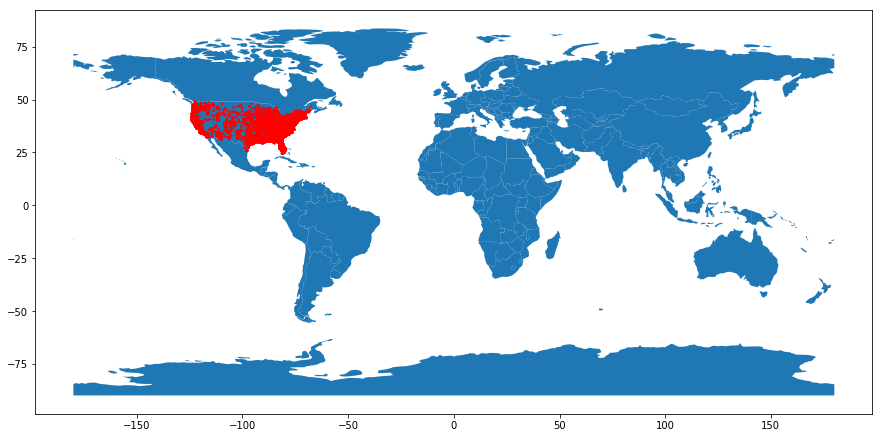

In [55]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15,15)), marker='o', color='red', markersize=2)
